In [1]:
import pandas as pd 
import os

In [2]:
repeat0 = 20
repeat1 = 4000

In [3]:
final_dfs = []
for i in range(2,3):
    final_df = pd.DataFrame()
    for j in range(2,13):
        os.system("./run.sh {} {}".format(i, j))

        data = pd.read_csv("results.csv", comment='#', delim_whitespace=True)
        data["Clock"] = pd.to_numeric(data["Clock"],errors='coerce')
        data["BrRetired"] = pd.to_numeric(data["BrRetired"],errors='coerce')
        data["BrMispred"] = pd.to_numeric(data["BrMispred"],errors='coerce')
        data["Clock"] = (data["Clock"]) / repeat1
        data["BrRetired"] = data["BrRetired"] / repeat1
        data["BrMispred"] = data["BrMispred"] / repeat1
        final_df[j] = data.groupby(data.index // repeat0).mean()["BrMispred"]
    final_dfs.append(final_df)

Experiment date and time: Thu 25 Jan 2024 12:48:56 PM EST


Experiment date and time: Thu 25 Jan 2024 12:49:14 PM EST
Experiment date and time: Thu 25 Jan 2024 12:49:31 PM EST
Experiment date and time: Thu 25 Jan 2024 12:49:48 PM EST
Experiment date and time: Thu 25 Jan 2024 12:50:06 PM EST
Experiment date and time: Thu 25 Jan 2024 12:50:23 PM EST
Experiment date and time: Thu 25 Jan 2024 12:50:40 PM EST
Experiment date and time: Thu 25 Jan 2024 12:50:58 PM EST
Experiment date and time: Thu 25 Jan 2024 12:51:15 PM EST
Experiment date and time: Thu 25 Jan 2024 12:51:32 PM EST
Experiment date and time: Thu 25 Jan 2024 12:51:50 PM EST


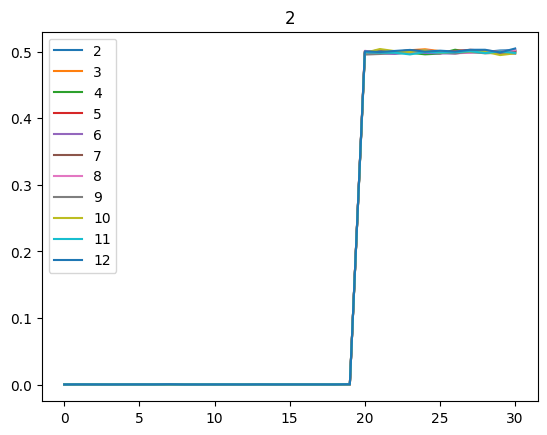

In [9]:
for i, df in enumerate(final_dfs, 2):
    df.plot(title="{}".format(i))